In [1]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
class CentroidResult:
    def __init__(self, resolution: float,
                 centroid_nodes: int,
                 centroid_edges: int,
                 alpha: float
                 ):
        self.resolution: float = resolution
        self.centroid_nodes: int = centroid_nodes
        self.centroid_edges: int = centroid_edges
        if centroid_nodes == 1:
            self.centroid_density = 0
        else:
            self.centroid_density = 2 * centroid_edges / (centroid_nodes * (centroid_nodes - 1))
        self.alpha: float = alpha
        self.speed_up: list[float] = []
        self.errors: list[float] = []
        self.absolute_time: list[float] = []
        self.absolute_err: list[float] = []


class CityResult:
    def __init__(self,
                 name: str,
                 name_suffix: str,
                 city_id: str,
                 nodes: int,
                 edges: int
                 ):
        self.name = name
        self.name_suffix: str = name_suffix
        self.id: str = city_id
        self.nodes: int = nodes
        self.edges: int = edges
        self.density: float = 2 * edges / (nodes * (nodes - 1))
        self.points_results: list[CentroidResult] = []

Загрузка данных

In [3]:
mypath = '../clusters_results/v3'

In [4]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

Обработка данных

In [5]:
USE_OPT_CONST = True # использовать ли фиттинг С0 для каждого города

In [80]:
def func(x,y=2, N = 1000):
        b1 = y * N /2
        b0 = y * N /2
        k = 2/np.sqrt(x*N)*(1 - np.log(x)/np.log(N)) + b1/b0 * x * (1 + np.log(x)/np.log(N)) +1/(np.sqrt(x*N)) * (b0+1)/b0/np.log(N)
        return 1/k

In [96]:
from tqdm import tqdm

N = np.linspace(1000,100000,100)
dens = np.linspace(1/1000,1,100)
x = np.linspace(1/10000, 1,1000)

In [28]:
print(np.arange(1,2,0.1))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


In [102]:
x = N
y = dens
x,y = y,x
X, Y = np.meshgrid(x, y)

Z = np.zeros((len(X),len(Y)))
# x = np.linspace(1/10000, 1,100)
for i,n in tqdm(enumerate(N), total=len(N)):
    for j,d in enumerate(dens):
        Z[i,j] = scipy.optimize.fmin(lambda x: -func(x,d,n), 0.05,disp=False)
# 
# 
# Z1 = np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)
# Z2 = (np.exp(-(((X - 1) / 1.5)**2 + ((Y - 1) / 0.5)**2) / 2) /
#         (2 * np.pi * 0.5 * 1.5))
# Z = Z2 - Z1
# 
# X = X * 10
# Y = Y * 10
# Z = Z * 500
# return X, Y, Z
print(X.shape)
print(Y.shape)
print(Z.shape)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_11678/1411582536.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = scipy.optimize.fmin(lambda x: -func(x,d,n), 0.05,disp=False)
100%|██████████| 100/100 [00:44<00:00,  2.25it/s]

(100, 100)
(100, 100)
(100, 100)


[[ 6.90775528  6.90775528  6.90775528 ...  6.90775528  6.90775528
   6.90775528]
 [ 6.90775528  6.90775528  6.90775528 ...  6.90775528  6.90775528
   6.90775528]
 [ 6.90775528  6.90775528  6.90775528 ...  9.31388105  9.31388105
   9.31388105]
 ...
 [ 6.90775528  6.90775528  6.90775528 ... 13.81551056 13.81551056
  13.81551056]
 [ 6.90775528  6.90775528  6.90775528 ... 13.81551056 13.81551056
  13.81551056]
 [ 6.90775528  6.90775528  6.90775528 ... 13.81551056 13.81551056
  13.81551056]]


In [128]:
x = N
y = 0.5
x, y = np.meshgrid(x, y)

z = 1/x**(1/3) +0

In [129]:
print(x.shape)

(1, 100)


In [132]:
print(y.shape)

(1, 100)


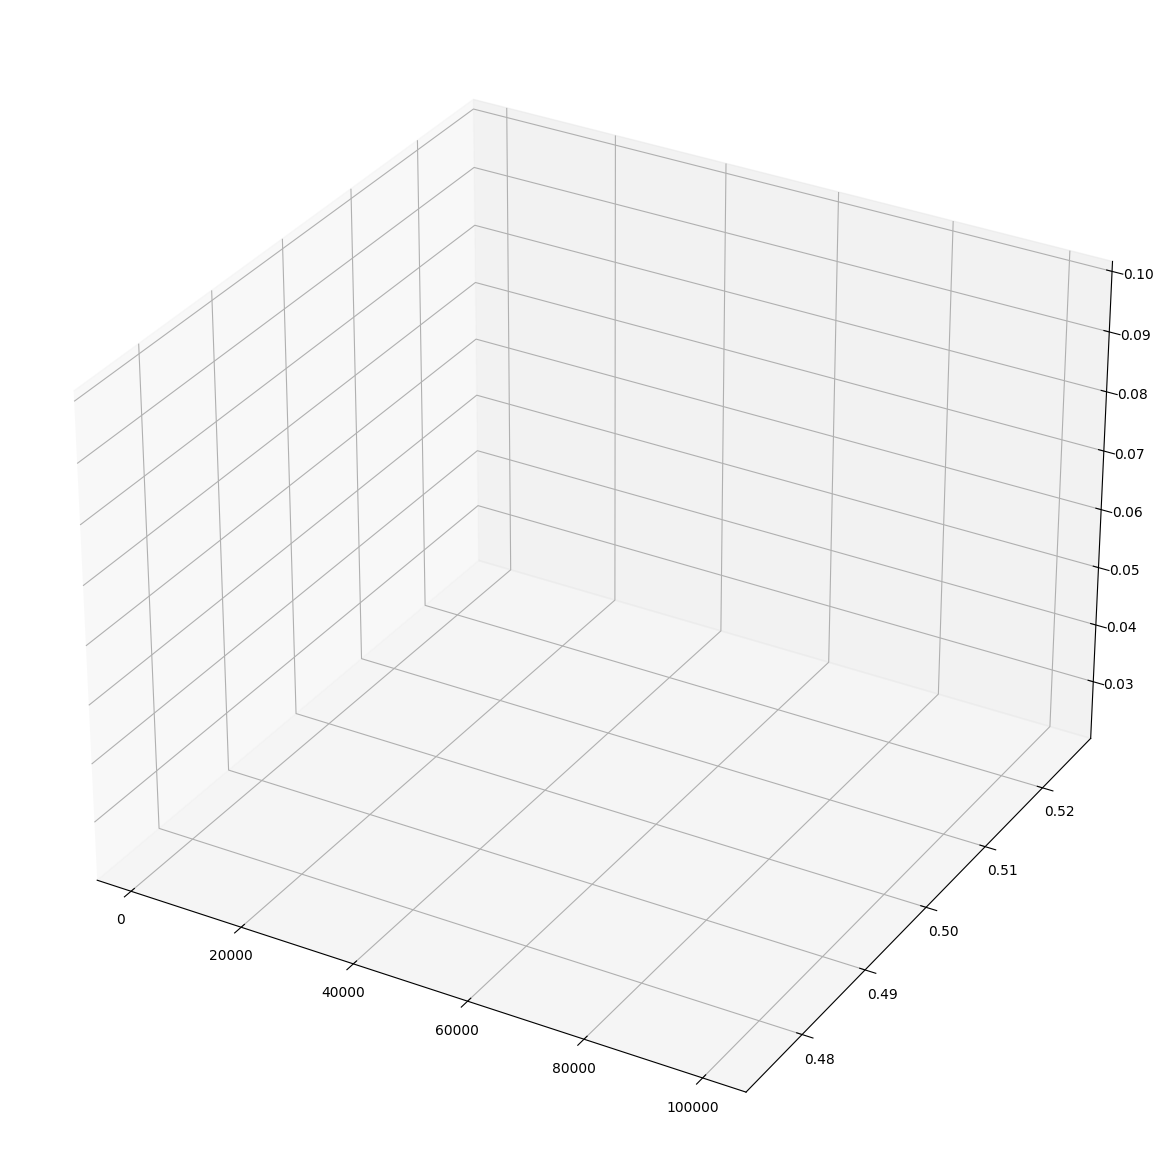

In [135]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d 
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
# X, Y, Z = axes3d.get_test_data(0.05)
# X = np.repeat(np.log(N), len(dens))
# Y = dens + 
# 0
# Z = np.zeros(len(X) * len(Y))

# Plot the 3D surface
# ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
#                 alpha=0.3)
ax.plot_surface(x, y, z,edgecolor='r', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
# x = N + 0
# y = x**(1/3) +1
# ax.plot(x,y, c = 'r')
# # Plot projections of the contours for each dimension.  By choosing offsets
# # that match the appropriate axes limits, the projected contours will sit on
# # the 'walls' of the graph.
# # ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
# ax.contour(X, Y, Z, zdir='x', offset=np.max(X), cmap='coolwarm')
# ax.contour(X, Y, Z, zdir='y', offset=np.max(Y), cmap='coolwarm')
# 
# ax.set(xlim=(np.min(X),np.max(X)), ylim=(np.max(Y),np.min(Y)), zlim=(0, np.max(Z)),
#        xlabel='density', ylabel='N', zlabel='alpha_optimum')

plt.show()

In [27]:
print(Z)

[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.0083816
   0.00947216]]


In [ ]:
# nodes = []
# alpha_max = []
# for name in r:
#     res:CityResult = r[name]
#     X = [p.alpha for p in res.points_results]
#     A = [p.speed_up[0] for p in res.points_results]
#     E = [np.mean(p.errors) for p in res.points_results]
# 
#     fig, axs = plt.subplots(1, 2)
#     fig.set_figwidth(25)
#     fig.set_figheight(15)
# 
#     axs[1].errorbar(X, E, fmt='o', label = "{}: {}".format(name, r[name].nodes))
#     axs[1].set(xlabel='alpha', ylabel='Err')
#     axs[1].legend()
# 
#     alpha = np.argmax(A)
#     alpha_max.append(X[alpha])
#     nodes.append(res.nodes)
#     N= res.nodes
#     
#     if USE_OPT_CONST:
#         popt = curve_fit(ax, X, A, p0 = [2])
#         x = np.linspace(1/N,1,5000)
#         y = ax(x, c0 = popt[0][0])
#     else:
#         x = np.linspace(1/N,1,5000)
#         y = ax(x)
#     axs[0].errorbar(x, y)
#     axs[0].errorbar(X, A, fmt='o', label = "{}: {}".format(name, r[name].nodes))
#     axs[0].set(xlabel='alpha', ylabel='     A')
#     axs[0].legend()
# 
# 
#     # print(res.nodes, X[alpha] )


In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.set(xlabel='alpha', ylabel='A')
axs.legend()

def f(x):
    return 2 ** (1/3) * np.log(4)/(4*np.log(x) + 12 + np.log(4)) / np.power(x, 1/3)
x = np.linspace(min(nodes), max(nodes), 1000)
y = 43.5*f(x)
axs.errorbar(x, y, fmt='o', label = "{}: {}".format(name, r[name].nodes))
axs.errorbar(nodes, alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))


Графики:

Построим график ускорения от плотности

Уберем последние 4 точки